(357, 500, 3)
(357, 500)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


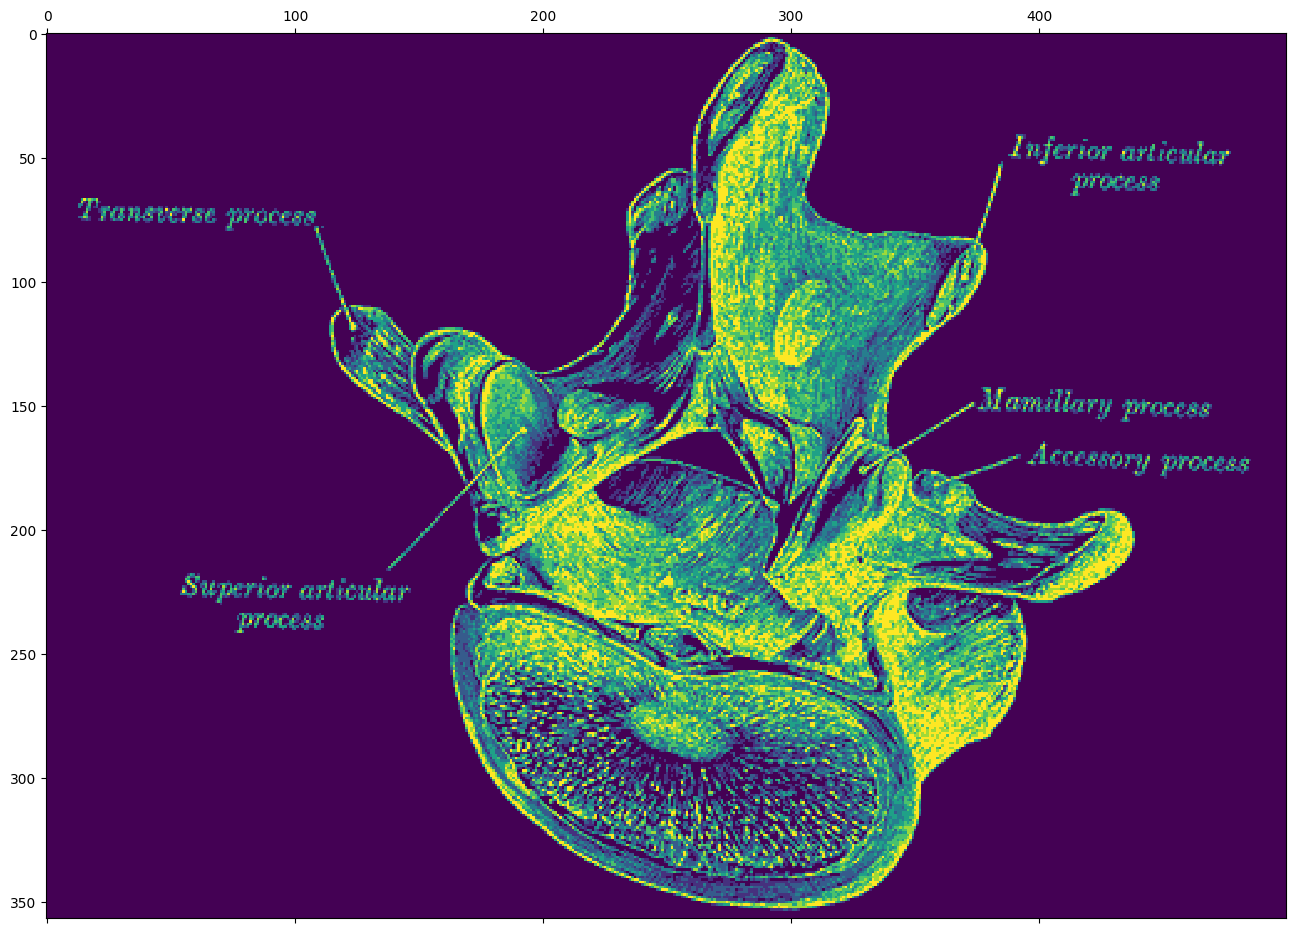

In [101]:
import numpy as np

from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line as draw_line
from skimage import data
import cv2
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.transform import probabilistic_hough_line
import random 

plt.rcParams['figure.figsize'] = [20, 20]

# Load image"
image_path = "/Users/nshelton/Pictures/plot_raster/gundam_title.png"
image_path = "/Users/nshelton/Pictures/plot_raster/kirby.jpg"
image_path = "/Users/nshelton/Pictures/plot_raster/akira.jpeg"
# image_path = "/Users/nshelton/Pictures/akira.jpeg"
# image_path = "/Users/nshelton/Pictures/osaka.jpg"
# image_path = "/Users/nshelton/Pictures/plot_raster/stairs.png"
# image_path = "/Users/nshelton/Desktop/Screenshot 2024-09-02 at 11.51.11 AM.png"
image_path = "/Users/nshelton/Pictures/Gray093.jpg"

image = cv2.imread(image_path)
print(image.shape)

# image[:,:,1] = image[:,:,0]
# image[:,:,2] = image[:,:,0]

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# _ , filtered =  cv2.threshold(image_gray, 150, 255, cv2.THRESH_BINARY_INV)


filtered = image_gray

# sigma = 2
# min_canny = 2
# max_canny = 10
# filtered = canny(image_gray, sigma, min_canny, max_canny).astype(np.uint8) * 255


filtered = 255 - filtered


# filtered = filtered[50:150, 50:150]
# filtered = filtered[950:1000, 1150:1200]
cv2.imwrite("filtered.png", filtered)

# filtered = cv2.resize(filtered, (-1,-1), fx = 0.5, fy = 0.5, interpolation = cv2.INTER_AREA)
print(filtered.shape)


filtered = filtered//32
# filtered = 7 - filtered
plt.matshow(filtered)

print(filtered)


In [102]:
print(np.unique(filtered))



[0 1 2 3 4 5 6 7]


In [84]:
filtered.shape

(178, 250)

In [103]:
from re import T
from tqdm import tqdm
from pathUtils import *

paths = []

thresholds = [ 1,  3, 4, 5]

vertical_paths = []

for col in tqdm(range(filtered.shape[1])):
    row = 0
    path = []
    while row < filtered.shape[0]:

        if filtered[row,col] <= thresholds[0]:
            if len(path) > 0:
                vertical_paths = add_path_with_merge(vertical_paths, path, add=True, threshold=1.5)
            path = []
        else:
            path.append([col, row])
        row += 1
    if len(path) > 0:
        vertical_paths = add_path_with_merge(vertical_paths, path, add=True, threshold=1.5)


print(len(vertical_paths))
paths += vertical_paths

horizontal_paths = []
for row in tqdm(range(filtered.shape[0])):
    col = 0
    path = []
    while col < filtered.shape[1]:
        if filtered[row,col] <= thresholds[1]:
            if len(path) > 0:
                horizontal_paths = add_path_with_merge(horizontal_paths, path, add=True, threshold=1.5)
            path = []
        else:
            path.append([col, row])
        col += 1

    if len(path) > 0:
        horizontal_paths = add_path_with_merge(horizontal_paths, path, add=True, threshold=1.5)

print(len(horizontal_paths))
paths += horizontal_paths

start_points = [[row, 0] for row in range(filtered.shape[0])] 
start_points += [[0, col] for col in range(filtered.shape[1])] 

diagonal_paths = []
for p in tqdm(start_points):
    row, col = p
    path = []
    while row < filtered.shape[0] and col < filtered.shape[1]:

        if filtered[row,col] <= thresholds[2]:
            if len(path) > 0:
                diagonal_paths = add_path_with_merge(diagonal_paths, path, add=True, threshold=1.5)
            path = []
        else:
            path.append([col, row])
        row += 1
        col += 1
    if len(path) > 0:
        diagonal_paths = add_path_with_merge(diagonal_paths, path, add=True, threshold=1.5)

print(len(diagonal_paths))
paths += diagonal_paths

diagonal_paths = []
start_points = [[row, filtered.shape[1]-1] for row in range(filtered.shape[0])] 

start_points += [[0, col] for col in range(filtered.shape[1])] 

for p in tqdm(start_points):
    row, col = p
    path = []
    while row < filtered.shape[0] and row >= 0 and col < filtered.shape[1] and col >= 0:
        if filtered[row,col] <= thresholds[3]:
            if len(path) > 0:
                diagonal_paths = add_path_with_merge(diagonal_paths, path, add=True, threshold=1.5)
            path = []
        else:
            path.append([col, row])
        row += 1
        col -= 1
    if len(path) > 0:
        diagonal_paths = add_path_with_merge(diagonal_paths, path, add=True, threshold=1.5)

print(len(diagonal_paths))
paths += diagonal_paths


100%|██████████| 500/500 [00:09<00:00, 53.22it/s]  


4010


100%|██████████| 357/357 [00:14<00:00, 25.40it/s] 


4820


100%|██████████| 857/857 [00:15<00:00, 54.80it/s] 


4590


100%|██████████| 857/857 [00:09<00:00, 94.51it/s]  

3600


In [104]:
path_list = [[p for p in path] for path in paths if len(path) > 1]

print(len(paths))
print(len(path_list))

merge_threshold = 1

for i in tqdm(range(len(path_list))):
    len_before = len(path_list)
    path_list = merge_one_path_kd(path_list, merge_threshold)
    if len_before == len(path_list):

        break

# def getPathLength(path):
    # length = 0g
    # for i in range(len(path) - 1):
        # length += np.linalg.norm(path[i] - path[i+1])
    # return length

# path_list = close_loops(path_list, threshold=0.01)
path_list  = [np.array(path) for path in path_list]

# path_list = [path for path in path_list if getPathLength(path) > 2]
# path_list = smooth_all_2(path_list, 0.01)

path_list = simplify_all(path_list, 0.001)
# path_list = smooth_all_2(path_list, 0.01)

# path_list = simplify_all(path_list, 0.1)

RENDER_SCALE = 0.5
render_img = plotPaths(path_list, RENDER_SCALE)
cv2.imwrite("render.png", render_img)

17020
14371


 40%|███▉      | 5739/14371 [09:22<14:06, 10.19it/s]  


True

In [107]:
path_list_smooth = smooth_all_2(path_list, 0.01)
# path_list = simplify_all(path_list, 0.5)


RENDER_SCALE = 0.5
render_img = plotPaths(path_list_smooth, RENDER_SCALE)
cv2.imwrite("render.png", render_img)

True

In [108]:
import json 
import uuid

# projects_folder = "/Users/nshelton/Hephaestus/projects"
projects_folder = "."

def writePlot(paths):
    dictionary = {
        "created_time": "4/7/2024 4:42:27 PM",
        "modified_time": "4/7/2024 6:27:36 PM",
        "camera_position": [100, 100],
        "zoom": 10.702,
        "aspect": 0.563,
        "dom_element": {},
        "plot_models": [],
    }

    dictionary["plot_models"].append(
        {
            "position": {"x": 0, "y": 0},
            "paths": [path.tolist() for path in path_list],
            "scale": 0.5,
            "id": str(uuid.uuid4()),
            "state": "none",
        }
    )


    with open(projects_folder + "/graysvertebrae.json", "w") as outfile:
        
        json.dump(dictionary, outfile)


writePlot(path_list)